# Data Structures and Algorithms
## Assignment 1

In [1]:
import time
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from scipy import stats

# <u>Part 1. Factorial algorithm</u>

The algorithm for factorial is as follows:
<center>Step 1: Declare N and F as integer variables.</center>

<center>Step 2: Initialize F=1.</center>

<center>Step 2: Enter the value of N.</center>

<center>Step 3: Check whether N>0, if not then F=1.</center>

<center>Step 4: If yes then, F=F*N</center>

<center>Step 5: Decrease the value of N by 1.</center>

<center>Step 6: Repeat step 4 and 5 until N=0.</center>

<center>Step 7: Now print the value of F.</center>

<center>The value of F will be the factorial of N(number).</center>

In [2]:
def get_timings_fact(func, N = 600):
    '''Function to get the running times of another function 
    being passed an increasing input/argument value'''
    loops = 100                    # number of loops for each input size
    
    temparray = [None] * loops     # to contain the timing of each loop
    timearray = [None] * N         # to contain the min value of each instance of temparray
    inputsize = [None] * N         # to contain the respective increasing values being passed to the factorial function
    
    for x in range(N):          
        for i in range(100):
            # timing section
            start = time.perf_counter()
            func(x)
            end = time.perf_counter()
            elapsedtime = end - start
            
            # putting the time of each loop into an array, to then be able to take the min as the 'true' running time
            temparray[i] = elapsedtime
            
        # this array will be for the y-axis
        timearray[x] = min(temparray)
        
        # this array will be for the x-axis
        inputsize[x] = x
    
    return timearray, inputsize
    
    
        

# <u>Part 2 & 3. Factorial Algorithm Implementations</u>

## Factorial: Iterative

In [3]:
def fact_iter(n):
    '''Implementation of the Factorial algorithm 
    using the Iterative approach'''
    if (n == 0):
        return 1
    else:
        factorial = 1
        for i in range(1, n+1):
            factorial *= i
        return factorial

In [4]:
res = get_timings_fact(fact_iter)
x_fact_iter = res[1]
y_fact_iter = res[0]


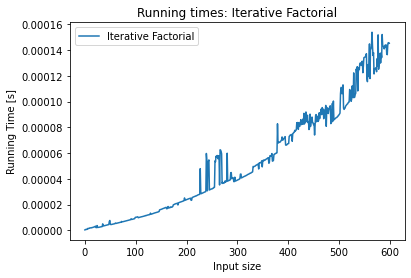

In [5]:
fig, ax = plt.subplots()
ax.set_xlabel('Input size')
ax.set_ylabel('Running Time [s]')
ax.set_title('Running times: Iterative Factorial')
plt.plot(x_fact_iter, y_fact_iter, label='Iterative Factorial')


plt.legend()
plt.show()

## Factorial: Non-tail recursive

In [6]:
def fact_recursive_non_tail(n):
    '''Implementation of the Factorial algorithm 
    using the Recursive Non-Tail approach'''
    if (n == 0):
        return 1        # base case
    return n * fact_recursive_non_tail(n-1)

In [7]:
res = get_timings_fact(fact_recursive_non_tail)
x_fact_nontail = res[1]
y_fact_nontail = res[0]


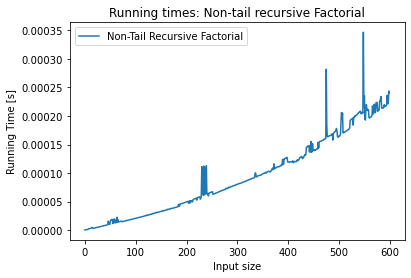

In [8]:
fig, ax = plt.subplots()
ax.set_xlabel('Input size')
ax.set_ylabel('Running Time [s]')
ax.set_title('Running times: Non-tail recursive Factorial')
plt.plot(x_fact_nontail, y_fact_nontail, label='Non-Tail Recursive Factorial')


plt.legend()
plt.show()

## Factorial: Tail recursive

This implementation uses an accumulator a to contain the result of the recursive process. 

In [9]:
def fact_recursive_tail(n, a = 1):
    '''Implementation of the Factorial algorithm 
    using the Tail Recursive approach'''
    if (n == 0):
        return a        # base case
    return fact_recursive_tail(n-1, a*n);

In [10]:
res = get_timings_fact(fact_recursive_tail)
x_fact_tail = res[1]
y_fact_tail = res[0]


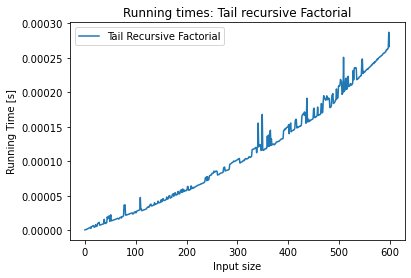

In [11]:
fig, ax = plt.subplots()
ax.set_xlabel('Input size')
ax.set_ylabel('Running Time [s]')
ax.set_title('Running times: Tail recursive Factorial')
plt.plot(x_fact_tail, y_fact_tail, label='Tail Recursive Factorial')



plt.legend()
plt.show()

## Comparison of 3 different Factorial running times

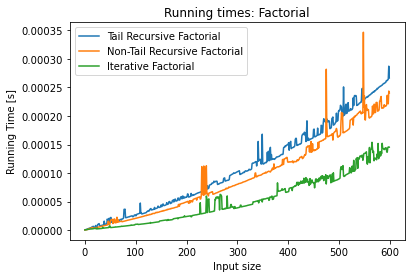

In [12]:
fig, ax = plt.subplots()
ax.set_xlabel('Input size')
ax.set_ylabel('Running Time [s]')
ax.set_title('Running times: Factorial')
plt.plot(x_fact_tail, y_fact_tail, label='Tail Recursive Factorial')
plt.plot(x_fact_nontail, y_fact_nontail, label='Non-Tail Recursive Factorial')
plt.plot(x_fact_iter, y_fact_iter, label='Iterative Factorial')


plt.legend()
plt.show()

# <u>Part 3 & 4. Search Algorithms</u>

In [28]:
def get_timings_search(func, seq, target, case = None, N = 600):
    '''Function to get the running times of a function with an increasing sequence as input. 
    Sequence increases up to a size N.'''
    
    loops = 100      # number of loops to time for each sequence length

    temparray = [None] * loops    # to contain the timing of each loop
    timearray = [None] * N        # to contain the min value of each new temparray
    inputsize = [None] * N        # contains the respective length of sequence (for y-axis)

    for x in range(N):
        for i in range(loops):

            # timing section
            start = time.perf_counter()
            func(seq, target)
            end = time.perf_counter()
            elapsedtime = end - start

            # putting the time of each loop into an array, to then be able to take the min of this array as the 'true' running time
            temparray[i] = elapsedtime

        # taking the minimum time in the temparray - this will be the y-axis
        timearray[x] = min(temparray)

        # this array will be for the x-axis
        inputsize[x] = len(seq)

        # increase size of sequence
        seq.append(seq[-1]+1)
        
        # for binary search iterative BEST case - target always needs to be the mid element of the sequence
        if case == 'BinaryBest':
            target = get_middle_element(seq)
            
        # for linear search WOSRT case - target always needs to be the last element
        elif case == 'LinearWorst':
            target = seq[-1]
            
            
    return timearray, inputsize

# Linear Search

<b><i>Implementation</i></b>

In [14]:
def linearSearch(sequence, target):
    '''Implementation of linear search algorithm'''
    for i in sequence:
        if i == target:
            return sequence.index(i)
    return -1

<b><i>Linear search: best and worst case running time</i></b>

In [15]:
# Linear Search: Worst-case and Best-case Running times
seq = [1]
last_element = seq[-1]
res = get_timings_search(linearSearch, seq, last_element, case = 'LinearWorst')
x_linear_worst = res[1]
y_linear_worst = res[0]

seq = [1]
first_element = seq[0]
res = get_timings_search(linearSearch, seq, first_element)
x_linear_best = res[1]
y_linear_best = res[0]

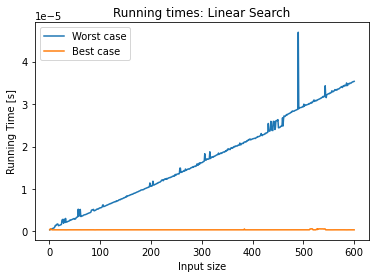

In [16]:
fig, ax = plt.subplots()
ax.set_xlabel('Input size')
ax.set_ylabel('Running Time [s]')
ax.set_title('Running times: Linear Search')
plt.plot(x_linear_worst, y_linear_worst, label='Worst case')
plt.plot(x_linear_best, y_linear_best, label='Best case')

plt.legend()
plt.show()

# Binary Search (Iterative)

<b><i>Implementation</i></b>

In [17]:
def binarySearchIterative(sequence, target):
    '''Implementation of iterative binary search algorithm'''
    
    left, right = 0, len(sequence)-1
    while left <= right: 
  
        mid = (right + left) // 2;
          
        # Check if target is present at mid 
        if sequence[mid] == target: 
            return mid 
  
        # If target is greater, ignore left half 
        if sequence[mid] < target: 
            left = mid + 1
  
        # If target is smaller, ignore right half 
        elif sequence[mid] > target: 
            right = mid - 1
      
    # If we reach here, then the element 
    # was not present 
    return -1

In [18]:
def get_middle_element(sequence):
    '''For Binary Search Best Case: Finding the mid element in the sequence. 
    (In the same way the binarySearchIterative function does)'''
    left = 0
    right = len(sequence)-1
    mid = (right + left) // 2
    return sequence[mid]

<b><i>Binary Search Iterative: Worst-case and Best-case Running times</i></b>

In [19]:
upperbound = 5000     # setting the max length of the sequence to be timed

seq = [1]
res = get_timings_search(binarySearchIterative, seq, -15, case = None, N = upperbound)
x_binary_worst = res[1]
y_binary_worst = res[0]

seq = [1]
res = get_timings_search(binarySearchIterative, seq, get_middle_element(seq), case ='BinaryBest', N = upperbound)
x_binary_best = res[1]
y_binary_best = res[0]

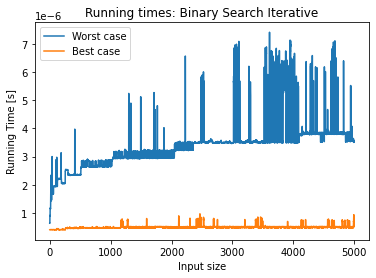

In [20]:
fig, ax = plt.subplots()
ax.set_xlabel('Input size')
ax.set_ylabel('Running Time [s]')
ax.set_title('Running times: Binary Search Iterative')
plt.plot(x_binary_worst, y_binary_worst, label='Worst case')
plt.plot(x_binary_best, y_binary_best, label='Best case')

plt.legend()
plt.show()

# <u>Part 5. Curve Fitting</u>

In [21]:
def plot_linear_regression(dataframes, labels, title = ''):
    '''Function that plots the best line of fit using linear regression'''
    colors = iter(['xkcd:blue with a hint of purple', 'green', 'red'])
    i = 0
    
    for df in dataframes:
        color = next(colors)
        slope, intercept, r_value, p_value, std_err = stats.linregress(df[df.columns[0]],df[df.columns[1]])
        ax = sns.regplot(x=str(df.columns[0]), y=str(df.columns[1]), 
                         data=df, marker='+', line_kws={"color": color}, 
                         scatter_kws={'color':color,'alpha':0.2}, 
                         label=labels[i]+":   y = {0:.3g}x + {1:.3g}".format(slope,intercept))
        i+=1
    ax.set(xlabel='Input size', ylabel='Running time [s]')
    ax.set_title(title)
    plt.legend()
    plt.show()
    

<b>Factorials</b>

In [22]:
# Creating dataframes for each of the factorial results

df_fact_iter = pd.DataFrame(list(zip(x_fact_iter, y_fact_iter)), columns = ['x_fact_iter', 'y_fact_iter'])
df_fact_nontail = pd.DataFrame(list(zip(x_fact_nontail, y_fact_nontail)), columns = ['x_fact_nontail', 'y_fact_nontail'])
df_fact_tail = pd.DataFrame(list(zip(x_fact_tail, y_fact_tail)), columns = ['x_fact_tail', 'y_fact_tail'])

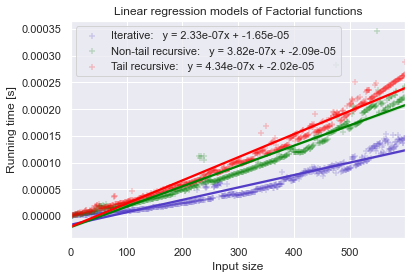

In [23]:
# Calling the plot function

dataframes = [df_fact_iter, df_fact_nontail, df_fact_tail]
labels=['Iterative', 'Non-tail recursive', 'Tail recursive']
plot_linear_regression(dataframes, labels, title = 'Linear regression models of Factorial functions')

<b>Linear Search</b>

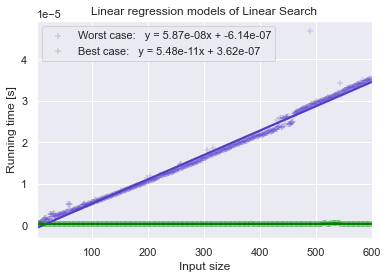

In [24]:
# Creating dataframes for both Best and Worst case running times computed for the Linear Search algorithm 

df_linear_worst = pd.DataFrame(list(zip(x_linear_worst, y_linear_worst)), columns = ['x_linear_worst', 'y_linear_worst'])
df_linear_best = pd.DataFrame(list(zip(x_linear_best, y_linear_best)), columns = ['x_linear_best', 'y_linear_best'])

# Calling the plot function

labels = ['Worst case', 'Best case']
dataframes = [df_linear_worst, df_linear_best]
plot_linear_regression(dataframes, labels, title = 'Linear regression models of Linear Search')

<b>Binary Search</b>

In [25]:
df_binary_worst = pd.DataFrame(list(zip(x_binary_worst, y_binary_worst)),
                               columns = ['x_binary_worst', 'y_binary_worst'])

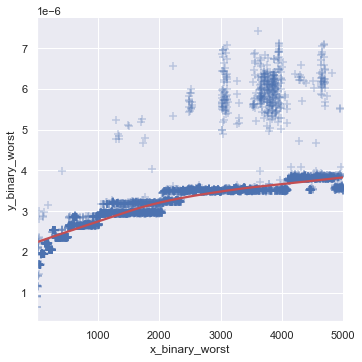

In [26]:
sns.lmplot(x="x_binary_worst", y="y_binary_worst", data=df_binary_worst,
           lowess=True, line_kws={"color": 'r'},markers='+', scatter_kws={"s": 80, 'alpha':0.3});

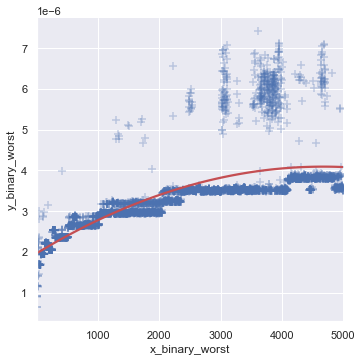

In [27]:
sns.lmplot(x="x_binary_worst", y="y_binary_worst", data=df_binary_worst,
           order=2, ci=None,line_kws={"color": 'r'},markers='+', scatter_kws={"s": 80, 'alpha':0.3});